#SimpleRNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab import drive


In [2]:
drive.mount('/content/drive')
data_AAPL = pd.read_csv('/content/drive/MyDrive/AAPL.csv')
data_GOOG = pd.read_csv('/content/drive/MyDrive/GOOG.csv')

Mounted at /content/drive


In [3]:
data_AAPL

,Date\tHigh\tLow\tOpen\tClose\tVolume\tAdj Close
0,2010-01-04\t30.64285659790039\t30.340000152587...
1,2010-01-05\t30.79857063293457\t30.464284896850...
2,2010-01-06\t30.747142791748047\t30.10714340209...
3,2010-01-07\t30.285715103149414\t29.86428642272...
4,2010-01-08\t30.285715103149414\t29.86571502685...
...,...
2259,2018-12-24\t151.5500030517578\t146.58999633789...
2260,2018-12-26\t157.22999572753906\t146.7200012207...
2261,2018-12-27\t156.77000427246094\t150.0700073242...
2262,2018-12-28\t158.52000427246094\t154.5500030517...


In [4]:
Data_A = data_AAPL.values
Data_G = data_GOOG.values
D_A = []
D_G = []

for i in range(2264):
  D_A.append(Data_A[i,0].split("\t"))
D_A = np.array(D_A)
D_A = np.reshape(D_A,(2264,7))

for i in range(2264):
  D_G.append(Data_G[i,0].split("\t"))
D_G = np.array(D_G)
D_G = np.reshape(D_G,(2264,7))

In [5]:
Data_AAPL = pd.DataFrame(data = D_A, columns = ['Date_A','High_A','Low_A','Open_A','Close_A','Volume_A','Adj Close_A'])
Data_GOOG = pd.DataFrame(data = D_G, columns = ['Date_G','High_G','Low_G','Open_G','Close_G','Volume_G','Adj Close_G'])

In [6]:
Data_AAPL['High_A'] = pd.to_numeric(Data_AAPL['High_A'], downcast="float")
Data_AAPL['Low_A'] = pd.to_numeric(Data_AAPL['Low_A'], downcast="float")
Data_AAPL['Open_A'] = pd.to_numeric(Data_AAPL['Open_A'], downcast="float")
Data_AAPL['Close_A'] = pd.to_numeric(Data_AAPL['Close_A'], downcast="float")
Data_AAPL['Volume_A'] = pd.to_numeric(Data_AAPL['Volume_A'], downcast="float")
Data_AAPL['Adj Close_A'] = pd.to_numeric(Data_AAPL['Adj Close_A'], downcast="float")
Data_GOOG['High_G'] = pd.to_numeric(Data_GOOG['High_G'], downcast="float")
Data_GOOG['Low_G'] = pd.to_numeric(Data_GOOG['Low_G'], downcast="float")
Data_GOOG['Open_G'] = pd.to_numeric(Data_GOOG['Open_G'], downcast="float")
Data_GOOG['Close_G'] = pd.to_numeric(Data_GOOG['Close_G'], downcast="float")
Data_GOOG['Volume_G'] = pd.to_numeric(Data_GOOG['Volume_G'], downcast="float")
Data_GOOG['Adj Close_G'] = pd.to_numeric(Data_GOOG['Adj Close_G'], downcast="float")

In [7]:
df = pd.concat([Data_AAPL,Data_GOOG], axis = 1, join = 'inner')

In [8]:
df.head()

,Date_A,High_A,Low_A,Open_A,Close_A,Volume_A,Adj Close_A,Date_G,High_G,Low_G,Open_G,Close_G,Volume_G,Adj Close_G
0,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469,2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
1,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476192.0,26.647457,2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597,2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
3,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119,2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735
4,2010-01-08,30.285715,29.865715,30.042856,30.282858,111902704.0,26.349140,2010-01-08,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956


In [9]:
# Making train and test data
data_train = df[df['Date_A']<'2016-12-30'].copy()
data_test = df[df['Date_A']>='2016-12-30'].copy()
data_training = data_train.copy()
data_test = data_test.copy()

In [10]:
# Dropping 'Date_A' and 'Date_G' and 'Adj Close'
data_train = data_train.drop(['Date_A', 'Date_G', 'Adj Close_G','Adj Close_A'], axis = 1)
data_test = data_test.drop(['Date_A', 'Date_G', 'Adj Close_G','Adj Close_A'], axis = 1)

In [11]:
print(data_train.shape)
print(data_test.shape)

(1761, 10)
(503, 10)


In [12]:
data_train

,High_A,Low_A,Open_A,Close_A,Volume_A,High_G,Low_G,Open_G,Close_G,Volume_G
0,30.642857,30.340000,30.490000,30.572857,123432400.0,313.579620,310.954468,312.304413,312.204773,3927000.0
1,30.798571,30.464285,30.657143,30.625713,150476192.0,312.747742,309.609497,312.418976,310.829926,6031900.0
2,30.747143,30.107143,30.625713,30.138571,138040000.0,311.761444,302.047852,311.761444,302.994293,7987100.0
3,30.285715,29.864286,30.250000,30.082857,119282800.0,303.861053,295.218445,303.562164,295.940735,12876600.0
4,30.285715,29.865715,30.042856,30.282858,111902704.0,300.498657,293.455048,294.894653,299.885956,9483900.0
...,...,...,...,...,...,...,...,...,...,...
1756,116.510002,115.639999,116.349998,116.290001,26085900.0,793.320007,788.580017,792.359985,791.260010,972200.0
1757,116.519997,115.589996,115.589996,116.519997,14249500.0,792.739990,787.280029,790.900024,789.909973,623400.0
1758,117.800003,116.489998,116.519997,117.260002,18296900.0,797.859985,787.656982,790.679993,791.549988,789100.0
1759,118.019997,116.199997,117.519997,116.760002,20905900.0,794.229980,783.200012,793.700012,785.049988,1153800.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
# feature scaling
sc = MinMaxScaler()
data_train = sc.fit_transform(data_train)
data_test = sc.fit_transform(data_test)

In [14]:
data_train

array([[0.02480623, 0.03033379, 0.02812311, ..., 0.15704659, 0.15939873,
        0.1317225 ],
       [0.0262678 , 0.03152627, 0.0296855 , ..., 0.15723804, 0.1570915 ,
        0.20246902],
       [0.02578509, 0.02809954, 0.02939171, ..., 0.1561391 , 0.143942  ,
        0.26818407],
       ...,
       [0.84287596, 0.8569392 , 0.8323028 , ..., 0.95654655, 0.9638188 ,
        0.02625644],
       [0.8449408 , 0.8541566 , 0.8416505 , ..., 0.96159387, 0.9529108 ,
        0.03851415],
       [0.83639944, 0.85607576, 0.83164847, ..., 0.94426274, 0.94911814,
        0.02475069]], dtype=float32)

In [15]:
X_train = []
y_train_A = []
y_train_G = []

for i in range(30, data_train.shape[0]):
    X_train.append(data_train[i-30:i])
    y_train_A.append(data_train[i, 3])
    y_train_G.append(data_train[i, 8])
y_train_A = np.reshape(y_train_A, (len(y_train_A), 1))
y_train_G = np.reshape(y_train_G, (len(y_train_G), 1))
y_train = np.concatenate((y_train_A, y_train_G), axis = 1)    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape , y_train.shape

((1731, 30, 10), (1731, 2))

In [16]:
print(X_train.shape)
print(y_train.shape)

(1731, 30, 10)
(1731, 2)


In [17]:
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [18]:
model1 = Sequential()

model1.add(SimpleRNN(units = 60,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
#model1.add(Dropout(0.2))

model1.add(SimpleRNN(units = 60,activation='relu', return_sequences = True))
#model1.add(Dropout(0.2))

model1.add(SimpleRNN(units = 80,activation='relu', return_sequences = True))
#model1.add(Dropout(0.2))

model1.add(SimpleRNN(units = 120))
#model1.add(Dropout(0.2))

model1.add(Dense(units = 2))

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 60)            4260      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30, 60)            7260      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 30, 80)            11280     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 120)               24120     
                                                                 
 dense (Dense)               (None, 2)                 242       
                                                                 
Total params: 47,162
Trainable params: 47,162
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling the Model
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
# Fitting the Model
start = time.time()
history = model1.fit(X_train, y_train, epochs =20, batch_size = 32, validation_split = 0.2)
end = time.time()

Epoch 1/20
44/44 [==============================] - 6s 56ms/step - loss: 0.0271 - val_loss: 0.0086
Epoch 2/20
44/44 [==============================] - 2s 41ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 3/20
44/44 [==============================] - 2s 39ms/step - loss: 8.2672e-04 - val_loss: 0.0083
Epoch 4/20
44/44 [==============================] - 2s 42ms/step - loss: 6.9188e-04 - val_loss: 0.0034
Epoch 5/20
44/44 [==============================] - 2s 39ms/step - loss: 7.0709e-04 - val_loss: 0.0059
Epoch 6/20
44/44 [==============================] - 2s 43ms/step - loss: 6.1985e-04 - val_loss: 0.0033
Epoch 7/20
44/44 [==============================] - 2s 39ms/step - loss: 5.7380e-04 - val_loss: 0.0036
Epoch 8/20
44/44 [==============================] - 2s 38ms/step - loss: 5.3624e-04 - val_loss: 0.0019
Epoch 9/20
44/44 [==============================] - 2s 41ms/step - loss: 6.7285e-04 - val_loss: 0.0045
Epoch 10/20
44/44 [==============================] - 2s 38ms/step - loss: 5.8226e

In [22]:
# Training Time
print('The training Time is : ', end - start)

The training Time is :  44.37292242050171


In [23]:
X_test = []
y_test_A = []
y_test_G = []

for i in range(30, data_test.shape[0]):
    X_test.append(data_test[i-30:i])
    y_test_A.append(data_test[i, 3])
    y_test_G.append(data_test[i, 8])

y_test_A = np.reshape(y_test_A, (len(y_test_A), 1))
y_test_G = np.reshape(y_test_G, (len(y_test_G), 1))
y_test = np.concatenate((y_test_A, y_test_G), axis = 1)    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((473, 30, 10), (473, 2))

In [24]:
#predictions
y_pred1 = model1.predict(X_test)
y_pred1.shape

(473, 2)

In [25]:
sc.scale_
scale = 1/8.18605127e-04
y_pred1 = y_pred1*scale
y_test = y_test*scale

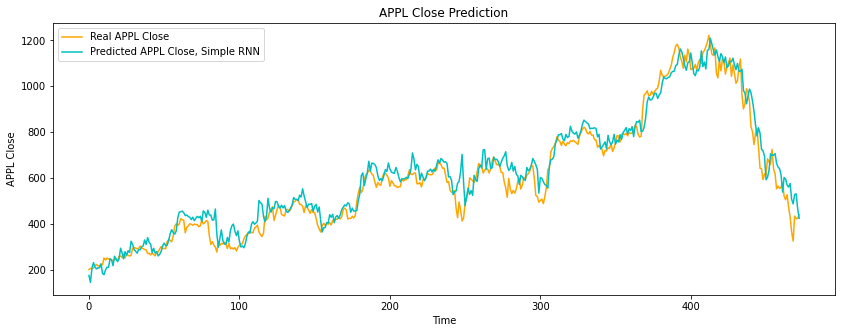

In [26]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test[:,0], color = 'orange', label = 'Real APPL Close')
plt.plot(y_pred1[:,0], color = "c", label = 'Predicted APPL Close, Simple RNN')
plt.title('APPL Close Prediction')
plt.xlabel('Time')
plt.ylabel('APPL Close')
plt.legend()
plt.show()

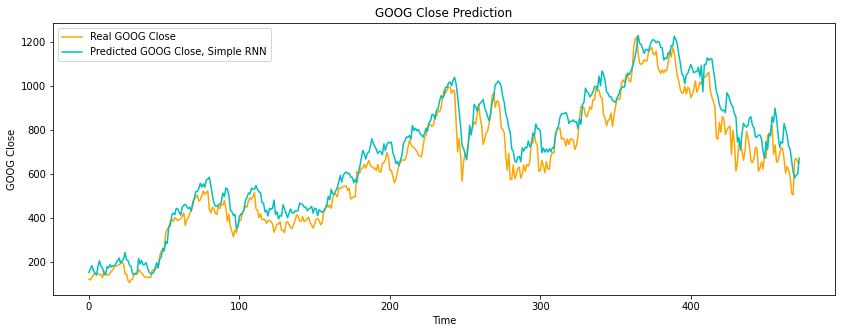

In [27]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test[:,1], color = 'orange', label = 'Real GOOG Close')
plt.plot(y_pred1[:,1], color = "c", label = 'Predicted GOOG Close, Simple RNN')
plt.title('GOOG Close Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Close')
plt.legend()
plt.show()

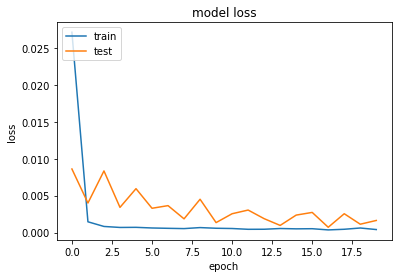

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()